# Перший рівень (спрощені завдання)

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt

Завантаження даних

In [54]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 

df = pd.DataFrame(X)

df.to_csv('individual_household_electric_power_consumption.csv', index=False)

print(df)


d:\Program Files\Anaconda\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

Створимо Pandas DataFrame

In [ ]:
df = pd.read_csv('individual_household_electric_power_consumption.csv', delimiter=',', na_valueues='?', header=0, dtype={
    "Date": str,
    "Time": str,
    "Global_active_power": float,
    "Global_reactive_power": float,
    "Voltpulse": float,
    "Global_intensity": float,
    "Sub_metering_1": float,
    "Sub_metering_2": float,
    "Sub_metering_3": float
})


df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.insert(0, 'DateTime', df.pop('DateTime'))

df.dropna(inplace=True)

print(df)

                   DateTime  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84             

Створимо NumPy Array на основі Pandas DataFrame

In [ ]:
numpyarray = df.to_numpy()

# Визначимо індекси масиву через змінні (для зручності роботи)
DateTime = 0
Global_active_power = 1
Global_reactive_power = 2
Voltpulse = 3
Global_intensity = 4
Sub_metering_1 = 5
Sub_metering_2 = 6
Sub_metering_3 = 7

print(df.columns)
print(numpyarray[:5])

Index(['DateTime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
[[Timestamp('2006-12-16 17:24:00') 4.216 0.418 234.84 18.4 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:25:00') 5.36 0.436 233.63 23.0 0.0 1.0 16.0]
 [Timestamp('2006-12-16 17:26:00') 5.374 0.498 233.29 23.0 0.0 2.0 17.0]
 [Timestamp('2006-12-16 17:27:00') 5.388 0.502 233.74 23.0 0.0 1.0 17.0]
 [Timestamp('2006-12-16 17:28:00') 3.666 0.528 235.68 15.8 0.0 1.0 17.0]]


1. Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [ ]:
def df_power_exceeds(df):
    power_exceeds = df[df['Global_active_power'] > 5]
    return power_exceeds

def numpyarray_power_exceeds(numpyarray):
    power_exceeds = numpyarray[numpyarray[:, Global_active_power] > 5] #Global_active_power = 1
    return power_exceeds

#виводимо датафрейм і масив
print("Pandas DataFrame")
print(df_power_exceeds(df).head())
pandas_time = ti.timeit(lambda: df_power_exceeds(df), number=1)
print(f"Pandas DataFrame filter time: {pandas_time} seconds")

print("NumPy Array")
print(numpyarray_power_exceeds(numpyarray))
numpy_time = ti.timeit(lambda: numpyarray_power_exceeds(numpyarray), number=1)
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
11 2006-12-16 17:35:00                5.412                  0.470   232.78   
12 2006-12-16 17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  
Pandas DataFrame filter time: 0.0027721999999812397 seconds
NumPy Array
[[Timestam

Обрати всі записи, у яких вольтаж перевищує 235 В.

In [ ]:
def df_voltpulse(df):
    voltpulse = df[df['Voltpulse'] > 235]
    return voltpulse

def numpyarray_voltpulse(numpyarray):
    voltpulse = numpyarray[numpyarray[:, Voltpulse] > 235] #Voltpulse = 3
    return voltpulse

#виводимо датафрейм і масив
print("Pandas DataFrame")
print(df_voltpulse(df).head())
pandas_time = ti.timeit(lambda: df_voltpulse(df), number=1)
print(f"Pandas DataFrame filter time: {pandas_time} seconds")

print("NumPy Array")
print(numpyarray_voltpulse(numpyarray))
numpy_time = ti.timeit(lambda: numpyarray_voltpulse(numpyarray), number=1)
print(f"NumPy Array filter time: {numpy_time} seconds")


Pandas DataFrame
              DateTime  Global_active_power  Global_reactive_power  Voltage  \
4  2006-12-16 17:28:00                3.666                  0.528   235.68   
5  2006-12-16 17:29:00                3.520                  0.522   235.02   
6  2006-12-16 17:30:00                3.702                  0.520   235.09   
7  2006-12-16 17:31:00                3.700                  0.520   235.22   
14 2006-12-16 17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  
Pandas DataFrame filter time: 0.045174699999734 seconds
NumPy Array
[[Timestamp('2

Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [ ]:
def df_sub_m2_more_than_sub_m3(df):
    df_intensity_range = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    sub_m2_more_than_sub_m3 = df_intensity_range[(df_intensity_range['Sub_metering_2']) > (df_intensity_range['Sub_metering_3'])]
    return sub_m2_more_than_sub_m3

def numpyarray_sub_m2_more_than_sub_m3(numpyarray):
    numpyarray_intensity_range = numpyarray[(numpyarray[:, Global_intensity] >= 19) & (numpyarray[:, Global_intensity] <= 20)]
    sub_m2_more_than_sub_m3 = numpyarray_intensity_range[numpyarray_intensity_range[:, Sub_metering_2] > numpyarray_intensity_range[:, Sub_metering_3]]
    return sub_m2_more_than_sub_m3

#виводимо датафрейм і масив
print("Pandas DataFrame")
print(df_sub_m2_more_than_sub_m3(df).head())
pandas_time = ti.timeit(lambda: df_sub_m2_more_than_sub_m3(df), number=1)
print(f"Pandas DataFrame filter time: {pandas_time} seconds")

print("NumPy Array")
print(numpyarray_sub_m2_more_than_sub_m3(numpyarray))
numpy_time = ti.timeit(lambda: numpyarray_sub_m2_more_than_sub_m3(numpyarray), number=1)
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
               DateTime  Global_active_power  Global_reactive_power  Voltage  \
45  2006-12-16 18:09:00                4.464                  0.136   234.66   
460 2006-12-17 01:04:00                4.582                  0.258   238.08   
464 2006-12-17 01:08:00                4.618                  0.104   239.61   
475 2006-12-17 01:19:00                4.636                  0.140   237.37   
476 2006-12-17 01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  
Pandas DataFrame filter time: 0.004755699999805074 seconds
NumPy Array

4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [ ]:
def df_random_sample_mean(df):
    random_indices = df.sample(n=500000, replace=False)
    random_sample_mean = random_indices[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return random_sample_mean 

def numpyarray_random_sample_mean(numpyarray):
    random_indices = numpyarray[np.random.choice(numpyarray.shape[0], 500000, replace=False)]
    random_sample_mean = np.mean(random_indices[:, Sub_metering_1:Sub_metering_3+1], axis=0)
    return random_sample_mean

#виводимо датафрейм і масив
print("Pandas DataFrame")
print(df_random_sample_mean(df).head())
pandas_time = ti.timeit(lambda: df_random_sample_mean(df), number=1)
print(f"Pandas DataFrame filter time: {pandas_time} seconds")

print("NumPy Array")
print(numpyarray_random_sample_mean(numpyarray))
numpy_time = ti.timeit(lambda: numpyarray_random_sample_mean(numpyarray), number=1)
print(f"NumPy Array filter time: {numpy_time} seconds")

Pandas DataFrame
Sub_metering_1    1.114164
Sub_metering_2    1.297646
Sub_metering_3    6.467492
dtype: float64
Pandas DataFrame filter time: 0.08439769999995406 seconds
NumPy Array
[1.122602 1.299886 6.459236]
NumPy Array filter time: 0.25666369999999006 seconds


5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [ ]:
def df_electricity_consumption(df):
    after_18 = df[df['DateTime'].dt.hour >= 18]
    power_exceeds = after_18[after_18['Global_active_power'] > 6]
    high_group_2 = power_exceeds[(power_exceeds['Sub_metering_2'] > power_exceeds['Sub_metering_1'])&(power_exceeds['Sub_metering_2'] > power_exceeds['Sub_metering_3'])]
    half = len(high_group_2)
    first_part = high_group_2[:half]
    second_part = high_group_2[half:]
    every_third = first_part[::3]
    every_fourth = second_part[::4]
    result = pd.concat([every_third, every_fourth])
    return result

def numpyarray_electricity_consumption(numpyarray):
    hours = np.array([dt.hour for dt in numpyarray[:, DateTime]])
    after_18 = numpyarray[hours >= 18]
    power_exceeds = after_18[after_18[:, Global_active_power] > 6]
    high_group_2 = power_exceeds[(power_exceeds[:, Sub_metering_2] > power_exceeds[:, Sub_metering_1])&(power_exceeds[:, Sub_metering_2] > power_exceeds[:, Sub_metering_3])]
    half = len(high_group_2)
    first_part = high_group_2[:half]
    second_part = high_group_2[half:]
    every_third = first_part[::3]
    every_fourth = second_part[::4]
    result = np.concatenate([every_third, every_fourth])
    return result

print("Pandas DataFrame")
print(df_electricity_consumption(df).head())
pandas_time = ti.timeit(lambda: df_electricity_consumption(df), number=1)
print(f"Pandas DataFrame filter time: {pandas_time} seconds")

print("NumPy Array")
print(numpyarray_electricity_consumption(numpyarray))
numpy_time = ti.timeit(lambda: numpyarray_electricity_consumption(numpyarray), number=1)
print(f"NumPy Array filter time: {numpy_time} seconds")    


Pandas DataFrame
                 DateTime  Global_active_power  Global_reactive_power  \
41    2006-12-16 18:05:00                6.052                  0.192   
44    2006-12-16 18:08:00                6.308                  0.116   
17494 2006-12-28 20:58:00                6.386                  0.374   
17498 2006-12-28 21:02:00                8.088                  0.262   
17501 2006-12-28 21:05:00                7.230                  0.152   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       Sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498            17.0  
17501          

# Другрий рівень (спрощені завдання)

In [52]:
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [58]:
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 

df = pd.DataFrame(X)

df.to_csv('auto_mpg.csv', index=False)

df = pd.read_csv('auto_mpg.csv')
print(df)


     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

1. Поборотися із зниклими даними. Для цього подивитись https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-valueues-in-python-a-complete-guide/

In [29]:
df.isnull().sum() #пропущено тільки 6 значень в horsepower, втрати не критичні, тому можем просто відкинути рядки з пропущеними значеннями

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [30]:
df = df.dropna(subset=[ 'horsepower'])
print(df)

df.isnull().sum() 

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [32]:
def normalize(df):
    normalized_df = df.copy()
    for col in normalized_df.columns:
        if pd.api.types.is_numeric_dtype(normalized_df[col]):
            min_value = normalized_df[col].min()
            max_value = normalized_df[col].max()
            if max_value != min_value:
                normalized_df[col] = (normalized_df[col] - min_value) / (max_value - min_value)
            else:
                normalized_df[col] = 0
    return normalized_df

normalized_df = normalize(df)
print(normalized_df)

     displacement  cylinders  horsepower    weight  acceleration  model_year  \
0        0.617571        1.0    0.456522  0.536150      0.238095         0.0   
1        0.728682        1.0    0.646739  0.589736      0.208333         0.0   
2        0.645995        1.0    0.565217  0.516870      0.178571         0.0   
3        0.609819        1.0    0.565217  0.516019      0.238095         0.0   
4        0.604651        1.0    0.510870  0.520556      0.148810         0.0   
..            ...        ...         ...       ...           ...         ...   
393      0.186047        0.2    0.217391  0.333711      0.452381         1.0   
394      0.074935        0.2    0.032609  0.146583      0.988095         1.0   
395      0.173127        0.2    0.206522  0.193365      0.214286         1.0   
396      0.134367        0.2    0.179348  0.286929      0.630952         1.0   
397      0.131783        0.2    0.195652  0.313864      0.678571         1.0   

     origin  
0       0.0  
1       0.0

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

In [33]:
print(df['horsepower'].dtype)
print(df['horsepower'].min(), df['horsepower'].max())
print(df['horsepower'].unique())


float64
46.0 230.0
[130.000000 165.000000 150.000000 140.000000 198.000000 220.000000 215.000000 225.000000 190.000000
 170.000000 160.000000  95.000000  97.000000  85.000000  88.000000  46.000000  87.000000  90.000000
 113.000000 200.000000 210.000000 193.000000 100.000000 105.000000 175.000000 153.000000 180.000000
 110.000000  72.000000  86.000000  70.000000  76.000000  65.000000  69.000000  60.000000  80.000000
  54.000000 208.000000 155.000000 112.000000  92.000000 145.000000 137.000000 158.000000 167.000000
  94.000000 107.000000 230.000000  49.000000  75.000000  91.000000 122.000000  67.000000  83.000000
  78.000000  52.000000  61.000000  93.000000 148.000000 129.000000  96.000000  71.000000  98.000000
 115.000000  53.000000  81.000000  79.000000 120.000000 152.000000 102.000000 108.000000  68.000000
  58.000000 149.000000  89.000000  63.000000  48.000000  66.000000 139.000000 103.000000 125.000000
 133.000000 138.000000 135.000000 142.000000  77.000000  62.000000 132.000000  84

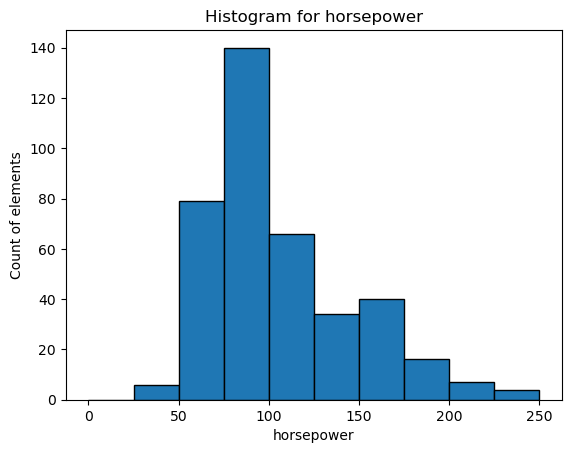

In [34]:
attr = 'horsepower'

bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

plt.hist(df[attr], bins=bins, edgecolor='black')
plt.xlabel(attr)
plt.ylabel('Count of elements')
plt.title(f'Histogram for {attr}' )
plt.show()

Збудувати графік залежності одного integer/real атрибута від іншого.

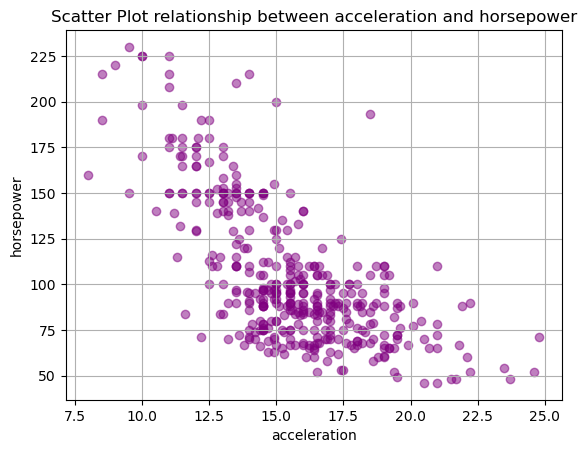

In [49]:
x_attr = 'acceleration'
y_attr = 'horsepower'

plt.scatter(df[x_attr], df[y_attr], color='purple', alpha=0.5)
plt.xlabel(x_attr)
plt.ylabel(y_attr)
plt.title(f'Scatter Plot relationship between {x_attr} and {y_attr}')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [46]:
x_attr = 'acceleration'
y_attr = 'horsepower'

x = df[x_attr]
y = df[y_attr]

pearson_coef, _ = pearsonr(x, y)
spearman_coef, _ = spearmanr(x, y)

print(f"Pearson coefficient: {pearson_coef}")
print(f"Spearman coefficient: {spearman_coef}")

Pearson coefficient: -0.6891955103342364
Spearman coefficient: -0.6581423040218369


6. Провести One Hot Encoding категоріального string атрибуту.

In [47]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[['origin']])

encoded_cols = [f"origin_{categories}" for categories in encoder.categories_[0]]

encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)

result_df = pd.concat([df, encoded_df], axis=1) # Об'єднуємо оригінальний DataFrame з новими колонками

print("Original:")
print(df)
print("\nEncoded:")
print(result_df)

Original:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1

7. Провести візуалізацію багатовимірних даних, використовуючи

приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

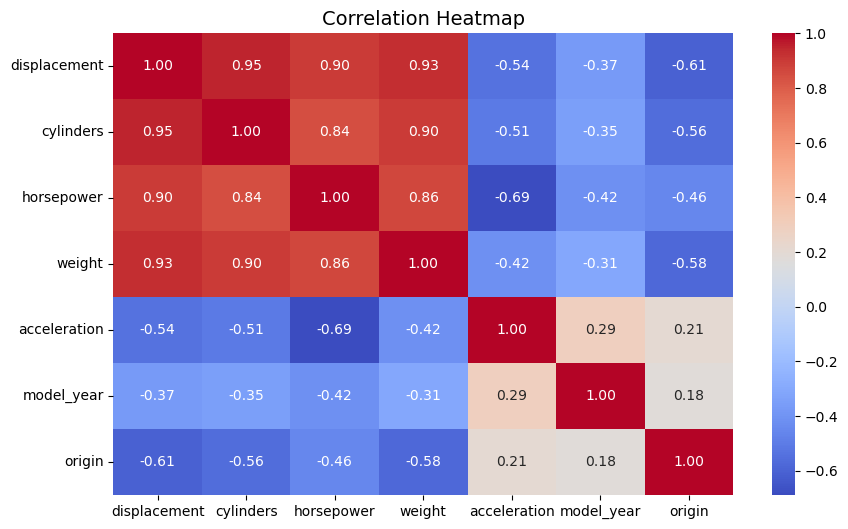

In [59]:
# Correlation Matrix Heatmap

plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

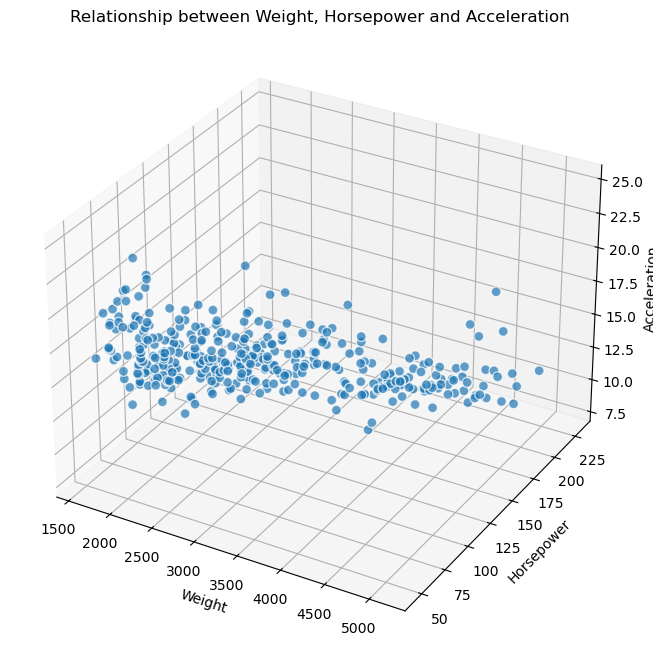

In [ ]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

xs = df['weight']
ys = df['horsepower']
zs = df['acceleration']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Acceleration')

plt.title("Relationship between Weight, Horsepower and Acceleration")
plt.show()